In [3]:
# shortcuts:
# run cell = cntl+enter
# new cell = alt+enter
# comment out highlighted area = cntl+/

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt

In [5]:
#import data - Highest Grossers
df = pd.read_csv('data/HighestGrossers.csv', header=0)

In [6]:
#quick look
df.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


In [7]:
#row count 
len(df.index)

27

In [8]:
#list columns
list(df.columns)

['YEAR',
 'MOVIE',
 'GENRE',
 'MPAA RATING',
 'DISTRIBUTOR',
 'TOTAL FOR YEAR',
 'TOTAL IN 2019 DOLLARS',
 'TICKETS SOLD']

In [9]:
#rename columns - clean up spaces
df = df.rename(columns={'YEAR': 'year', 'MOVIE': 'movie', 'GENRE': 'genre', 'MPAA RATING': 'mpaa',
                        'DISTRIBUTOR': 'distrib', 'TOTAL FOR YEAR': 'total', 'TOTAL IN 2019 DOLLARS': 'total2019',
                        'TICKETS SOLD': 'tixSold'})
list(df.columns)

['year', 'movie', 'genre', 'mpaa', 'distrib', 'total', 'total2019', 'tixSold']

In [10]:
#unique values in column 'mpaa'
df.mpaa.unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

In [11]:
#unique values in column 'genre'
df.genre.unique()

array(['Drama', 'Adventure', 'Action', nan], dtype=object)

In [12]:
#view datatypes
df.dtypes

year          int64
movie        object
genre        object
mpaa         object
distrib      object
total        object
total2019    object
tixSold      object
dtype: object

In [13]:
#clean data - remove commas
df = df.replace(',','',regex=True)
df.head()

,year,movie,genre,mpaa,distrib,total,total2019,tixSold
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,$184031112,$387522978,42306002
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,$306169255,$634504608,69269062
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,$250650052,$500207943,54607854
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,$443319081,$865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,$430443350,$776153749,84732942


In [14]:
#attempting to remove $, didn't work
df['total'] = df['total'].astype(str)
df['total2019'] = df['total2019'].astype(str)
df = df.replace('$','',regex=True)
df.head()

,year,movie,genre,mpaa,distrib,total,total2019,tixSold
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,$184031112,$387522978,42306002
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,$306169255,$634504608,69269062
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,$250650052,$500207943,54607854
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,$443319081,$865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,$430443350,$776153749,84732942


In [15]:
#convert tixSold into INT datatype
df['tixSold'] = df['tixSold'].astype(str).astype(int)
df.dtypes

year          int64
movie        object
genre        object
mpaa         object
distrib      object
total        object
total2019    object
tixSold       int32
dtype: object

In [16]:
#create sub-table of just mpaa and tickets sold
dfmpaa = pd.DataFrame(df, columns=['mpaa', 'tixSold'])

In [17]:
#quick look
dfmpaa.head()

,mpaa,tixSold
0,PG-13,42306002
1,PG-13,69269062
2,PG-13,54607854
3,PG-13,94524324
4,PG,84732942


In [18]:
#verify INT datatype
dfmpaa.dtypes

mpaa       object
tixSold     int32
dtype: object

In [19]:
#What is the average Ticket Sale per MPAA Rating?
mpaa_grp = dfmpaa.groupby(['mpaa']).mean()
mpaa_grp.sort_values(by=['tixSold'], ascending=False)

,tixSold
mpaa,
PG-13,6.256830e+07
PG,6.241699e+07
G,5.446811e+07
R,2.231636e+07


In [20]:
#create sub-table of just genre and tickets sold
dfgenre = pd.DataFrame(df, columns=['genre', 'tixSold'])
dfgenre.head()

,genre,tixSold
0,Drama,42306002
1,Adventure,69269062
2,Adventure,54607854
3,Adventure,94524324
4,Adventure,84732942


In [21]:
#What is the average Ticket Sale per genre?
genre_grp = dfgenre.groupby(['genre']).mean()
genre_grp.sort_values(by=['tixSold'])

,tixSold
genre,
Drama,4.230600e+07
Action,6.188695e+07
Adventure,6.373876e+07


In [22]:
#import Annual Ticket Sales
df1 = pd.read_csv('data/AnnualTicketSales.csv', header=0)
df1.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [23]:
#rename columns
df1 = df1.rename(columns={'YEAR': 'year', 'TICKETS SOLD': 'tixSold','TOTAL BOX OFFICE':'totalBox', 'TOTAL INFLATION ADJUSTED BOX OFFICE': 'totalAdjusted',
                          'AVERAGE TICKET PRICE': 'avgPrice', 'Unnamed: 5': 'un'})
list(df1.columns)

['year', 'tixSold', 'totalBox', 'totalAdjusted', 'avgPrice', 'un']

In [24]:
#drop blank column
df1 = df1.drop('un', 1)
df1.head()

,year,tixSold,totalBox,totalAdjusted,avgPrice
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97


In [25]:
#remove commas from tixSold
#removing $ is still not working -_-
df1['tixSold'] = df1['tixSold'].replace(',','',regex=True)
df1['totalBox'] = df1['totalBox'].replace('$','',regex=True)
df1['totalAdjusted'] = df1['totalAdjusted'].replace('$','',regex=True)
df1.head()

,year,tixSold,totalBox,totalAdjusted,avgPrice
0,2021,423774881,"$3,881,777,912","$3,881,777,912",$9.16
1,2020,223638958,"$2,048,534,616","$2,048,534,616",$9.16
2,2019,1228541629,"$11,253,443,955","$11,253,444,050",$9.16
3,2018,1311536128,"$11,948,096,650","$12,013,670,952",$9.11
4,2017,1225639761,"$10,993,991,460","$11,226,860,216",$8.97


In [26]:
#verify datatypes
df1['tixSold'] = df1['tixSold'].astype(str).astype(int)
df1.dtypes

year              int64
tixSold           int32
totalBox         object
totalAdjusted    object
avgPrice         object
dtype: object

In [27]:
#create sub-table of year and tixSold
dfyear = pd.DataFrame(df1, columns=['year','tixSold'])
dfyear.head()

,year,tixSold
0,2021,423774881
1,2020,223638958
2,2019,1228541629
3,2018,1311536128
4,2017,1225639761


In [28]:
#average tixSold per year
year_grp = dfyear.groupby(['year']).mean()
year_grp.sort_values(by=['tixSold'], ascending=False)

,tixSold
year,
2002,1575756527
2003,1524589620
2004,1495651298
2001,1465874205
1999,1444664086
1998,1443832471
2007,1420036680
2009,1418567388
2006,1398738283


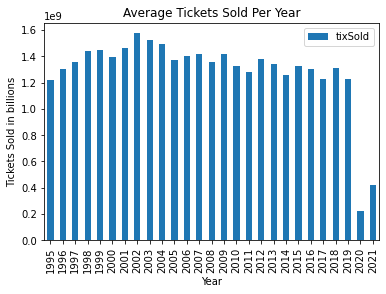

In [37]:
#plot Average Tix Sold / Year
plot = year_grp.plot(kind='bar', title='Average Tickets Sold Per Year', xlabel='Year', ylabel='Tickets Sold in billions')

In [43]:
fig = plot.get_figure()
fig.savefig("data/results/plot_output.png")